# 0. Dependências

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# 1. Introdução 

A **Regressão Linear** é um algoritmo de Machine Learning que tenta prever um valor contínuo ($Y$) dado alguma variável independente ($X$). Tal algoritmo é denominado assim, pois a equação que define o algoritmo é dada pela equação da reta: 

$$Y = B0 + B1*X$$

Onde $B0$ e $B1$ são estimados pela seguinte fórmula:

$$B1 = C(X,Y)*\frac{\sigma(Y)}{\sigma(X)}$$

$$B0 = \overline{Y} - B1*\overline{X}$$

Onde, 
- $X$ = variável independente;
- $Y$ = saída real (varíavel resposta ou dependente);
- $\overline{X}$ e $\overline{Y}$ representam a média de $X$ e $Y$, respectivamente;
- $\sigma(X)$ e $\sigma(Y)$ representam o desvio-padrão de $X$ e $Y$, respectivamente;
- $C(X,Y)$ representa a correlação normalizada entre $X$ e $Y$, dada pela seguinte fórmula:

$$C(X,Y) = \frac{\sum(X-\overline{X})(Y-\overline{Y})}{\sqrt{\sum(X-\overline{X})^{2}\sum(Y-\overline{Y})^{2}}}$$

Existem outras formas conhecidas de se calcular os coeficientes $B0$ e $B1$. Tais quais:

$$B0 = \frac{\sum X^2 \sum Y - \sum XY \sum X}{N \sum X^2 - (\sum X)^2}$$

$$B1 = \frac{\sum XY - \overline{Y}\sum X}{\sum X^2 - \overline{X}\sum X}$$

$$B1 = \frac{N\sum XY - \sum X \sum Y}{N\sum X^2 - (\sum X)^2}$$

Vale salientar que todas as fórmulas dão o mesmo resultado. Escolha a que você achar melhor.

# 2. Dados

In [2]:
df = pd.read_csv("data/measures.csv", sep=",")
df.head()

,Gender,Height,Weight,Height (cm),Weight (kg)
0,Male,73.847017,241.893563,187.571423,109.720985
1,Male,68.781904,162.310473,174.706036,73.622732
2,Male,74.110105,212.740856,188.239668,96.497550
3,Male,71.730978,220.042470,182.196685,99.809504
4,Male,69.881796,206.349801,177.499762,93.598619


(10000, 1) (10000, 1)


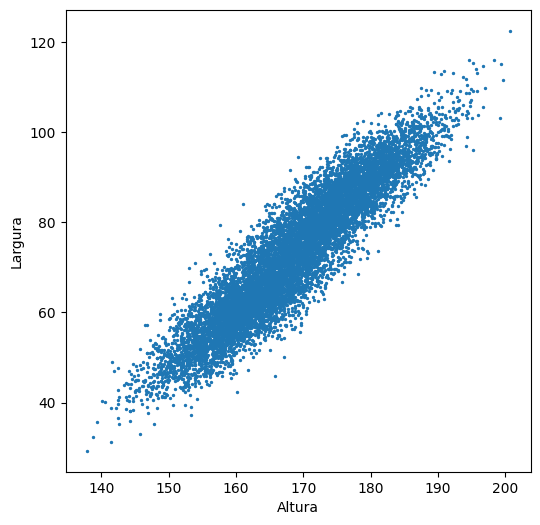

In [3]:
x = df["Height (cm)"].values.reshape(-1, 1)
y = df["Weight (kg)"].values.reshape(-1, 1)

print(x.shape, y.shape)

plt.figure(figsize=(6, 6))
plt.scatter(x, y, s=2)
plt.xlabel("Altura")
plt.ylabel("Largura")

plt.show()

# 3. Implementação 

In [4]:
def correlation(x, y):
    x1 = x - np.mean(x)
    y1 = y - np.mean(y)

    num = np.sum(x1 * y1)
    div = np.sqrt(np.sum(x1**2) * np.sum(y1**2))
    return num / div

In [5]:
class MyLinearRegression:
    def __init__(self):
        self.b0 = 0.0
        self.b1 = 0.0

    def fit(self, x, y):
        self.b1 = correlation(x, y) * np.std(y) / np.std(x)
        self.b0 = np.mean(y) - (self.b1 * np.mean(x))

    def predict(self, x):
        return self.b0 + self.b1 * x

# 4. Teste 

b0: -159.091584309573 b1: 1.3781495809365503


Text(0, 0.5, 'Peso')

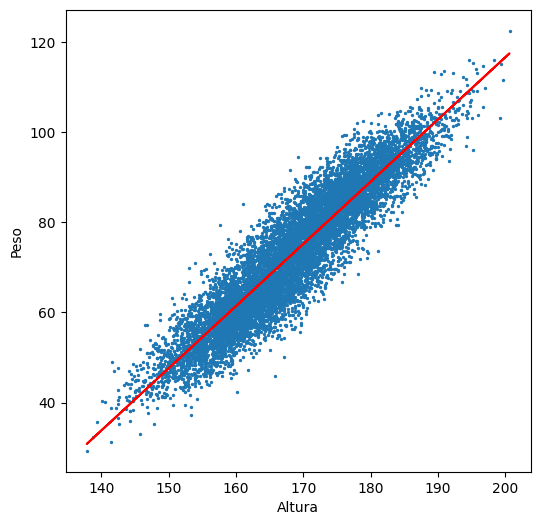

In [6]:
reg = MyLinearRegression()
reg.fit(x, y)

print("b0: {} b1: {}".format(reg.b0, reg.b1))

plt.figure(figsize=(6, 6))
plt.scatter(x, y, s=2)
plt.plot(x, reg.predict(x), c="red")
plt.xlabel("Altura")
plt.ylabel("Peso")

### Comparação com o Scikit-learn

b0: [-159.09158431] b1: [[1.37814958]]


Text(0, 0.5, 'Peso')

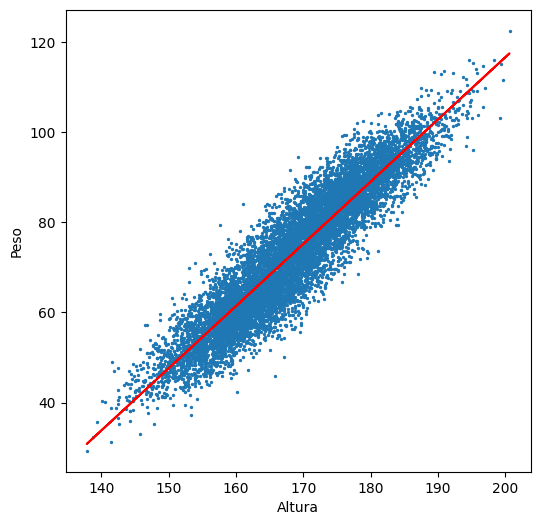

In [7]:
from sklearn.linear_model import LinearRegression

reg = LinearRegression()
reg.fit(x, y)

print("b0: {} b1: {}".format(reg.intercept_, reg.coef_))

plt.figure(figsize=(6, 6))
plt.scatter(x, y, s=2)
plt.plot(x, reg.predict(x), c="red")
plt.xlabel("Altura")
plt.ylabel("Peso")

## Notas sobre Medidas de Erro de Regressão

Antes de finalizar, é importante destacar as diferenças entre algumas das principais medidas de erro usada para mensurar a regressão linear, apontando as vantagens e desvantagens de cada uma.

### Soma dos erros absolutos
**Vantagens:**
- Baixo custo computacional

**Desvantagens:**
- Pode existir mais de uma reta que geram a mesma soma de erro

### Soma dos erros quadrados
**Vantagens:**
- Garantia de somente uma reta ótima

**Desvantagens:**
- Maior custo computacional
- Cresce com a quantidade de dados. Exemplo: a mesma reta para dois conjuntos diferentes - um com mais pontos que o outro -, vai ocasionar num erro mais para o conjunto com mais pontos.

### $R^2$
**Vantagens:**
- Mede quanto a mudança da saída é explicada pela mudança na entrada
- Resultado normalizado entre 0 e 1

De forma resumida, use $R^2$ para medir o seu erro de regressão.

## 5. Referências

1. https://helloacm.com/the-machine-learning-case-study-how-to-predict-weight-over-heightgender-using-linear-regression/